In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [92]:
df1 = pd.read_csv(r"C:\Users\madas\Downloads\drive-download-20231125T054245Z-001\deliveries.csv")
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [93]:
df2 = pd.read_csv(r"C:\Users\madas\Downloads\drive-download-20231125T054245Z-001\matches.csv")
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [104]:
df2.rename(columns = {'id':'match_id'}, inplace = True)

In [111]:
df = pd.merge(df2,df1,on="match_id",how = "outer")

In [112]:
df.shape

(179078, 38)

#### 2. The column which has the most missing values according to the data is:

In [113]:
df.isna().sum()

match_id                 0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

In [131]:
df.isna().sum().iloc[17:18]#The column umpire3 has the most missing values according to the dataset

umpire3    150712
dtype: int64

#### 3. City which hosted most number of seasons according to the data is:


In [135]:
df2['city'].value_counts().nlargest()

city
Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: count, dtype: int64

In [134]:
df2['city'].value_counts()[0:1]

city
Mumbai    101
Name: count, dtype: int64

### 4. Which year has the most number of matches played?


In [136]:
df2['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [137]:
df2['season'].value_counts()[:1]

season
2013    76
Name: count, dtype: int64

### 5. Maximum wins by Mumbai Indians in 2011 are

In [138]:
season_2011 = df2[df2["season"]==2011]

(season_2011["winner"] == "Mumbai Indians").sum()

10

In [142]:
sum(df2[df2["season"]==2011]["winner"] == "Mumbai Indians")

10

### 6. For 'toss_decision' feature what kind of plot is suitable?

In [143]:
df2['toss_decision'].value_counts()

toss_decision
field    463
bat      293
Name: count, dtype: int64

<Axes: xlabel='toss_decision'>

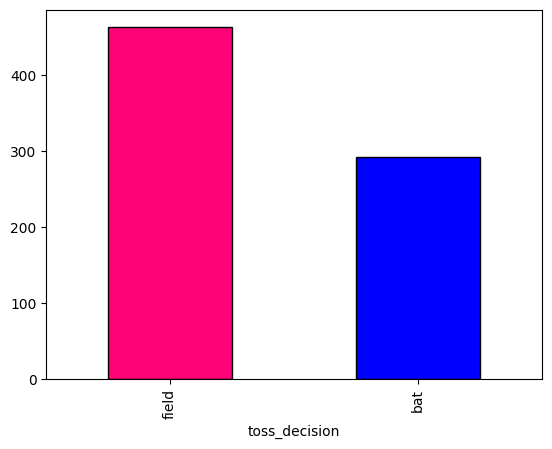

In [144]:
df2['toss_decision'].value_counts().plot(kind = 'bar',color = ['#fc0377','blue'],edgecolor = 'black')

<Axes: ylabel='count'>

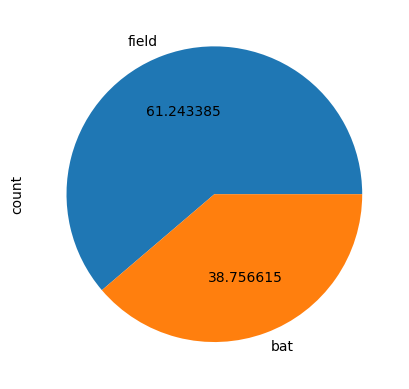

In [145]:
df2['toss_decision'].value_counts().plot(kind = 'pie',autopct = '%1f')

### 7.  What is the percentage of getting bat and field in feature 'toss_descision'?

<Axes: ylabel='count'>

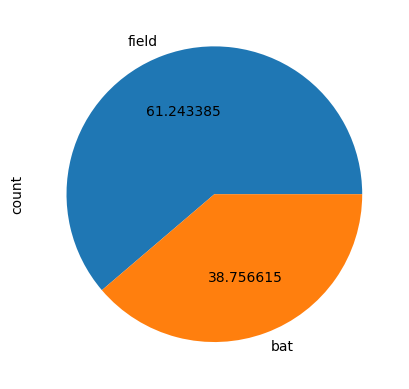

In [146]:
df2['toss_decision'].value_counts().plot(kind = 'pie',autopct = '%1f')

### 8.  Which statement holds true


 Teams winning tosses and electing field first have won more number of matches.

In [147]:
df2['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [151]:
df2.groupby(by=["toss_decision"])["winner"].count()

toss_decision
bat      292
field    460
Name: winner, dtype: int64

### 9. In which years where taking batting second have won more number of matches?

In [155]:
pd.crosstab(columns = df2['toss_decision'],index = df2['season'])

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


### 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

<Axes: >

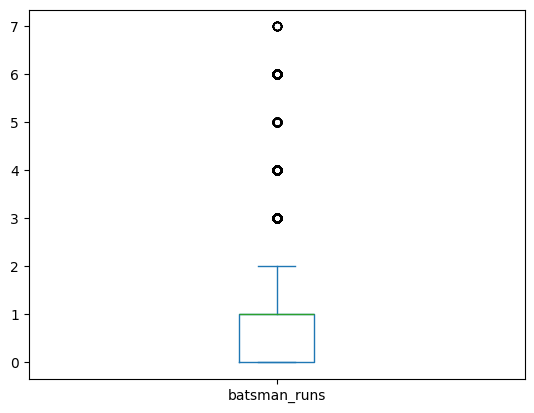

In [62]:
df['batsman_runs'].plot(kind = 'box')

In [275]:
df[df['batsman_runs']>0]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
7,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
10,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
13,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179072,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


### 11.In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [173]:
df['batsman'].nunique()

516

In [166]:
sum((df['season']==2019)&(df['batsman_runs']==6)|(df['batsman_runs']==4))

21170

In [169]:
season_2019 = df[df['season']==2019]

a =season_2019[(season_2019['batsman_runs'] == 6 ) | (season_2019['batsman_runs'] == 4 )]

b = a.groupby(by="batsman")['total_runs'].sum()
print(b.max())
b[b == 442]

442


batsman
AD Russell    442
Name: total_runs, dtype: int64

### 12. Most number of wickets taken by a bowler is


In [171]:
df1['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [170]:
a = df1[(df1['dismissal_kind'] == 'bowled') | (df1['dismissal_kind'] == 'caught')|(df1['dismissal_kind'] == 'lbw')|(df1['dismissal_kind'] == 'caught and bowled')|(df1['dismissal_kind'] == 'stumped')|(df1['dismissal_kind'] == 'hit wicket')]

a['bowler'].value_counts().nlargest(1)

bowler
SL Malinga    170
Name: count, dtype: int64

### 13.  What is the strike rate of Kohli in 2016
*
HINT: strike rate = (Total Runs / Total Balls Faced) * 100

In [244]:
sum((df['season']==2016)&(df['batsman_runs']=='V Kohli')|(df['batsman']=='V Kohli'))

4211

In [246]:
len('V Kohli')*100

700

In [247]:
4211/700

6.015714285714286

### 14.  Bowlers with maximum number of extras

In [222]:
bowlers = df.groupby(by="bowler")['extra_runs'].sum()

bowlers.nlargest()

bowler
SL Malinga    293
P Kumar       236
UT Yadav      219
DJ Bravo      201
B Kumar       197
Name: extra_runs, dtype: int64

In [224]:
bowlers.nlargest()[0:1]

bowler
SL Malinga    293
Name: extra_runs, dtype: int64

### 15. Which venue has hosted most number of IPL matches?

In [226]:
df['venue'].value_counts()

venue
Eden Gardens                                            17991
Wankhede Stadium                                        17590
M Chinnaswamy Stadium                                   16872
Feroz Shah Kotla                                        15604
Rajiv Gandhi International Stadium, Uppal               13303
MA Chidambaram Stadium, Chepauk                         12006
Sawai Mansingh Stadium                                  11158
Punjab Cricket Association Stadium, Mohali               8266
Maharashtra Cricket Association Stadium                  5055
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
Punjab Cricket Association IS Bindra Stadium, Mohali     3315
Sardar Patel Stadium, Motera                             2893
SuperSport Park                                          2866
Brabourne Stadium                                        2719
Dr

In [225]:
df['venue'].value_counts()[:1]

venue
Eden Gardens    17991
Name: count, dtype: int64

### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [229]:
player = df[(df['season'] == 2017) &
  (df['batting_team'] == 'Sunrisers Hyderabad') &
  (df['bowling_team'] == 'Royal Challengers Bangalore')]

In [230]:
player['player_of_match'].unique()[0]

'Yuvraj Singh'

### 17. Across seasons who are the top three batsman's with most number of run out?

In [214]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [231]:
out = df1[df1['dismissal_kind'] == 'run out']

out['batsman'].value_counts().nlargest(3)

batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: count, dtype: int64

In [232]:
out['batsman'].value_counts().nlargest(3)[:1]

batsman
MS Dhoni    21
Name: count, dtype: int64

### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [233]:
virat_burmah = df[(df['batsman'] == 'V Kohli') & (df['bowler']=='JJ Bumrah')]
virat_burmah['batsman_runs'].sum()

112

### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [238]:
out = df1[df1['dismissal_kind'] == 'caught and bowled']

out['batsman'].value_counts().nlargest(3)

batsman
SK Raina     7
RG Sharma    6
AT Rayudu    5
Name: count, dtype: int64

In [239]:
out['batsman'].value_counts().nlargest(3)[:1]

batsman
SK Raina    7
Name: count, dtype: int64

### 20. which player has the highest hard-hitting ability?


In [241]:
hard_hitting = df[df['batsman_runs'] == 6]['batsman'].value_counts().nlargest(3)

In [242]:
hard_hitting

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
Name: count, dtype: int64

In [243]:
hard_hitting[:1]

batsman
CH Gayle    327
Name: count, dtype: int64